# Measures of Variability

Measures of Variability are statistics that describe the amount of difference and spread in a data set. 

These measures include variance, standard deviation, range, interquartile range, among others.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set_style("whitegrid")

## Variance

Variance measures how far a set of numbers is spread out from their mean value.

In [2]:
data = pd.read_csv('student-mat.csv',sep=';')
print(data.shape)
data.head()

(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


The database has 33 variables. We are going to work with a subset of them:

- **G1**: first period grade (***`numeric`***: from 0 to 20)
- **G2**: second period grade (***`numeric`***: from 0 to 20)
- **G3**: final grade (***`numeric`***: from 0 to 20, output target)

In [3]:
data = data[['G1','G2','G3','school','sex']]
print(data.shape)
data.head()

(395, 5)


,G1,G2,G3,school,sex
0,5,6,6,GP,F
1,5,5,6,GP,F
2,7,8,10,GP,F
3,15,14,15,GP,F
4,6,10,10,GP,F


In [4]:
# Calculating the variance
np.round(data.groupby('sex').var(),2)

,G1,G2,G3
sex,,,
F,10.45,13.26,21.37
M,11.51,14.96,20.21


In [5]:
# Calculating the standard deviation
np.round(data.groupby('sex').std(),2)

,G1,G2,G3
sex,,,
F,3.23,3.64,4.62
M,3.39,3.87,4.50


In [6]:
# Calculating the variance
np.round(data.groupby('school').var(),2)

,G1,G2,G3
school,,,
GP,11.02,14.50,21.39
MS,11.20,11.41,17.95


In [7]:
# Calculating the standard deviation
np.round(data.groupby('school').std(),2)

,G1,G2,G3
school,,,
GP,3.32,3.81,4.63
MS,3.35,3.38,4.24


This is an example of samples from two different populations with the same mean but different dispersion. 

In [8]:
sample1 = np.random.normal(0, 10, 1000)
sample2 = np.random.normal(0, 50, 1000)

The blue population is much more dispersed than the red one.

In [9]:
print('Variance of sample1 = %.2f' %(np.var(sample1)))
print('Variance of sample2 = %.2f' %(np.var(sample2)))

Variance of sample1 = 95.93
Variance of sample2 = 2623.02


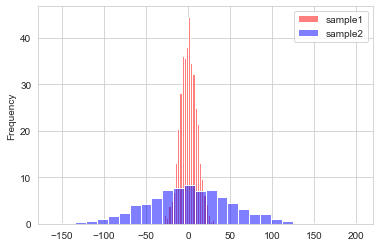

In [10]:
sns.histplot(sample1, stat='frequency', color='red',  alpha=0.5, label='sample1')
sns.histplot(sample2, stat='frequency', color='blue', alpha=0.5, label='sample2')
plt.legend();

Using kdeplot:

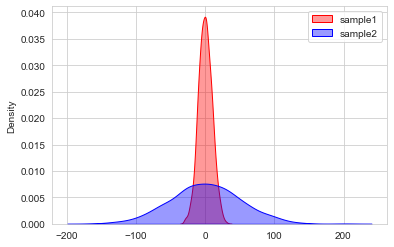

In [11]:
sns.kdeplot(sample1, shade=True, color='red',  alpha=0.4, label='sample1')
sns.kdeplot(sample2, shade=True, color='blue', alpha=0.4, label='sample2')
plt.legend();

**Variance** is a measurement of the spread among numbers in a data set. It measures how far each number in the set is from the mean.

This example returns the variance of the sample. 

In [12]:
print('Variance of G1 = %.3f' %(data.G1.var()))
print('Variance of G2 = %.3f' %(data.G2.var()))
print('Variance of G3 = %.3f' %(data.G3.var()))

Variance of G1 = 11.017
Variance of G2 = 14.149
Variance of G3 = 20.990


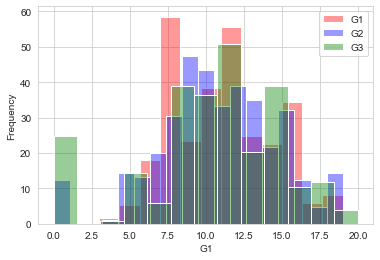

In [13]:
sns.histplot(data.G1, stat='frequency', color='red',    alpha=0.4, label='G1')
sns.histplot(data.G2, stat='frequency', color='blue',   alpha=0.4, label='G2')
sns.histplot(data.G3, stat='frequency',  color='green', alpha=0.4, label='G3')
plt.legend();

It is hard to see diferences among histograms. Let's use kdeplot:

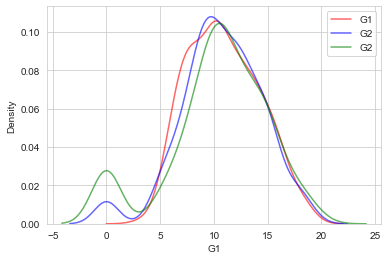

In [14]:
sns.kdeplot(data.G1, color='red',   alpha=0.6, label='G1')
sns.kdeplot(data.G2, color='blue',  alpha=0.6, label='G2')
sns.kdeplot(data.G3, color='green', alpha=0.6, label='G2')
plt.legend();

## Standard Deviation

The `standard deviation` is a statistic that measures the dispersion of a dataset relative to its mean and is calculated as the square root of the variance.

If the data points are further from the mean, there is a higher deviation within the data set; thus, the more spread out the data, the higher the standard deviation.

In [15]:
print('sample1')
print('Variance  = %.2f' %(np.var(sample1)))
print('Standard Deviation = %.2f' %(np.std(sample1)))
print('Standard Deviation Squared = %.2f' % np.std(sample1)**2)

sample1
Variance  = 95.93
Standard Deviation = 9.79
Standard Deviation Squared = 95.93


In [16]:
print('sample2')
print('Variance  = %.2f' %(np.var(sample2)))
print('Standard Deviation = %.2f' %(np.std(sample2)))
print('Standard Deviation Squared = %.2f' % np.std(sample2)**2)

sample2
Variance  = 2623.02
Standard Deviation = 51.22
Standard Deviation Squared = 2623.02


 The **variance** is the squeare of the **standard deviation**.

Let's calculate the standard deviation of G1, G2, and G3

In [17]:
print('-G1-')
print('Variance  = %.2f' %(np.var(data.G1)))
print('Standard Deviation = %.2f' %(np.std(data.G1)))
print('Standard Deviation Squared = %.2f' % np.std(data.G1)**2)

-G1-
Variance  = 10.99
Standard Deviation = 3.31
Standard Deviation Squared = 10.99


In [18]:
print('-G2-')
print('Variance  = %.2f' %(np.var(data.G2)))
print('Standard Deviation = %.2f' %(np.std(data.G2)))
print('Standard Deviation Squared = %.2f' % np.std(data.G2)**2)

-G2-
Variance  = 14.11
Standard Deviation = 3.76
Standard Deviation Squared = 14.11


In [19]:
print('-G3-')
print('Variance  = %.2f' %(np.var(data.G3)))
print('Standard Deviation = %.2f' %(np.std(data.G3)))
print('Standard Deviation Squared = %.2f' % np.std(data.G3)**2)

-G3-
Variance  = 20.94
Standard Deviation = 4.58
Standard Deviation Squared = 20.94


## Range

In statistics, the **range** of a set of data is the difference between the largest and smallest value.

In [20]:
print('Range of G1 = %.2f' % (data.G1.max() - data.G1.min()))
print('Range of G2 = %.2f' % (data.G2.max() - data.G2.min()))
print('Range of G3 = %.2f' % (data.G3.max() - data.G3.min()))

Range of G1 = 16.00
Range of G2 = 19.00
Range of G3 = 20.00


## Interquartile Range

The **interquartile range (IQR)** is a measure of variability, based on dividing a data set into quartiles.

The **interquartile range** is the difference between the third quartile and the first quartile in a data set, giving the middle 50%. 

In [21]:
print('-G1-')
print('Q1 = ',np.percentile(data.G1, 25))
print('Q2 = ',np.percentile(data.G1, 50))
print('Q3 = ',np.percentile(data.G1, 75))
IQ_G1 = np.percentile(data.G1, 75) - np.percentile(data.G1, 25)
print('Interquartile Range = %i' %(IQ_G1))

-G1-
Q1 =  8.0
Q2 =  11.0
Q3 =  13.0
Interquartile Range = 5


In [22]:
print('-G2-')
print('Q1 = ',np.percentile(data.G2, 25))
print('Q2 = ',np.percentile(data.G2, 50))
print('Q3 = ',np.percentile(data.G2, 75))
IQ_G2 = np.percentile(data.G2, 75) - np.percentile(data.G2, 25)
print('Interquartile Range = %i' %(IQ_G2))

-G2-
Q1 =  9.0
Q2 =  11.0
Q3 =  13.0
Interquartile Range = 4


In [23]:
print('-G3-')
print('Q1 = ',np.percentile(data.G3, 25))
print('Q2 = ',np.percentile(data.G3, 50))
print('Q3 = ',np.percentile(data.G3, 75))
IQ_G3 = np.percentile(data.G3, 75) - np.percentile(data.G3, 25)
print('Interquartile Range = %i' %(IQ_G3))

-G3-
Q1 =  8.0
Q2 =  11.0
Q3 =  14.0
Interquartile Range = 6


The boxplots help us to see the interquartile range.

The width of the box is the interquartile range.

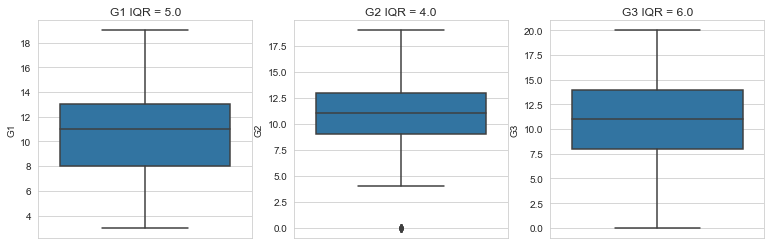

In [24]:
plt.figure(figsize=(13,4))

plt.subplot(131)
sns.boxplot(y=data.G1)
plt.title('G1 IQR = '+str(IQ_G1))

plt.subplot(132)
sns.boxplot(y=data.G2)
plt.title('G2 IQR = '+str(IQ_G2))

plt.subplot(133)
sns.boxplot(y=data.G3)
plt.title('G3 IQR = '+str(IQ_G3));

We can join the three boxplots in an only graph.

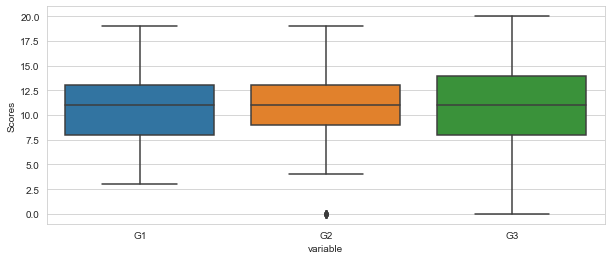

In [25]:
plt.figure(figsize=(10,4))
dd = pd.melt(data,value_vars=['G1', 'G2', 'G3'], value_name='Scores')
sns.boxplot(x=dd.variable,y=dd.Scores);

## Coefficient of variation


The **coefficient of variation (CV)**, also known as relative standard deviation, is a standardized measure of dispersion of a probability distribution or frequency distribution.

The **coefficient of variation** is  the ratio of the standard deviation to the mean. 

In [26]:
from scipy.stats import variation

In [27]:
print('Coefficient of variation of G1 = %.2f' %(variation(data.G1)))
print('Coefficient of variation of G2 = %.2f' %(variation(data.G2)))
print('Coefficient of variation of G3 = %.2f' %(variation(data.G3)))

Coefficient of variation of G1 = 0.30
Coefficient of variation of G2 = 0.35
Coefficient of variation of G3 = 0.44


Using the formula:

In [28]:
print('-G1-')
print('Standar Deviation = %.2f' %(data.G1.std()))
print('Mean              = %.2f\n' %(data.G1.mean()))
print('Coefficient of variation = %.2f' %(data.G1.std()/data.G1.mean()))

-G1-
Standar Deviation = 3.32
Mean              = 10.91

Coefficient of variation = 0.30


In [29]:
print('-G2-')
print('Standar Deviation = %.2f' %(data.G2.std()))
print('Mean              = %.2f\n' %(data.G2.mean()))
print('Coefficient of variation = %.2f' %(data.G2.std()/data.G2.mean()))

-G2-
Standar Deviation = 3.76
Mean              = 10.71

Coefficient of variation = 0.35


In [30]:
print('-G3-')
print('Standar Deviation = %.2f' %(data.G3.std()))
print('Mean              = %.2f\n' %(data.G3.mean()))
print('Coefficient of variation = %.2f' %(data.G3.std()/data.G3.mean()))

-G3-
Standar Deviation = 4.58
Mean              = 10.42

Coefficient of variation = 0.44


How can you interpret the **coefficient of variation**?

Let's see two examples:

***Group 1***: standard deviation = 50, mean =150

In [31]:
# Group 1:  
std_Group1  = 50
mean_Group1 = 150
print('The coefficient of variation of Group1 = %.2f' %(std_Group1/mean_Group1))

The coefficient of variation of Group1 = 0.33


***Group 2***: standard deviation = 50, mean =500

In [32]:
# Group 2:  
std_Group2  = 50
mean_Group2 = 500
print('The coefficient of variation of Group2 = %.2f' %(std_Group2/mean_Group2))

The coefficient of variation of Group2 = 0.10



Both groups have the same standard deviation. Despite this, Group1 has more variation than Group2.

A variation of 50 affects Group1 more than Group2.Both groups have the same standard deviation. Despite this, Group1 has more variation than Group2.

A variation of 50 affects **Group1** more than **Group2**.

In [33]:
print('The coefficient of variation of Group1 = %.2f' %(std_Group1/mean_Group1))
print('The coefficient of variation of Group2 = %.2f' %(std_Group2/mean_Group2))

The coefficient of variation of Group1 = 0.33
The coefficient of variation of Group2 = 0.10
